## Logistic Regression
Linear regression is used to predict values of quantities as a linear function of the input values. When predicting a discrete variable, such as whether a grid of pixel intensities represents 0 or 1, we need to classify the input values. Logistic regression is a simple classification algorithm for learning to make such decisions. It is a model that is used when the dependent variable is categorical. A few cases where logistic regression can be used are mentioned below:
- Image segmentation and categorization
- Geographic image recognition
- Handwriting recognition
- Determining whether a person is depressed based on the words of his social media posts
- Predicting the probability of a person voting for a candidate in an election

Logistic regression falls under supervised learning; it measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic/sigmoid function. Despite the name 'logistic regression', it is not used for machine learning regression problem where the task is to predict the real-valued output. It is a classification problem that is used to predict a binary outcome (1/0, -1/1, True/False) given a set of independent variables. Logistic regression is a bit similar to linear regression, or we can say it as a generalized linear model. In linear regression, we predict a real-valued output ' y' based on a weighted sum of input variables.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/RhPKYU1R/logistic.PNG "Linear")

$$ y = c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n}$$

Linear regression aims to estimate values for the model coefficients $c$, $w_{1}$, $w_{1}$, $w_{3}$...$w_{n}$ and fit the training data with minimal squared error and predict the output y.

Logistic regression does the same thing, but with one addition. The logistic regression model computes a weighted sum of the input variables similar to the linear regression, but it runs the result through a special
non-linear function, the logistic function or sigmoid function, to produce the output y. Here, the output is binary or in the form of 0/1 or -1/1.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/JDilmsrZ/logistic1.PNG "Logistic")


The sigmoid/logistic function is given by the following equation:

$$ y = logistic (c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n})$$
$$ y = 1/e^{-(c \;+ \;w_{1} * \;x_{1} + \;w_{2} * \;x_{2}* \;w_{3} * \;x_{3} +... \;w_{n} * \;x_{n})}$$
$$ y = 1/e^{-x}$$

As you can see in the below graph, it is an S-shaped curve that gets closer to 1 as the input variable's value increases above 0 and gets closer to 0 as the input variable decreases below 0. The output of the sigmoid function is 0.5 when the input variable is 0.

![alt text](https://d2a032ejo53cab.cloudfront.net/Glossary/CZwY5Wru/sigmoid.PNG "Sigmoid")

In this notebook, you will perform the following steps:

1)Import Data

2)Logistic Regression Model

3)Predict the Values

4)Plot the Result

Import Data

We will use Scikit-Learn library is to perform the logistic regression.

We will use an Iris dataset which is already available in the Scikit-Learn library. This data sets consists of 3 different types of irises: Setosa, Versicolour and virginica.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import linear_model
from sklearn import linear_model, datasets

# Import pandas
import pandas as pd

Now we will import the iris dataset and explore the dataset's features. Then, we will understand how to choose target and predictor variables for a logistic regression model.

In [ ]:
# Import iris dataset from sklearn
iris = datasets.load_iris()

# Coverting iris dataset into dataframe using pandas
iris_dataset = pd.DataFrame(iris.data, columns=iris.feature_names)

# Defining target variable
iris_dataset['target'] = pd.Series(iris.target)

# Printing iris_dataset
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


From the above iris_dataset it is clear that we have four feature variables named sepal length,sepal width,petal length, petal width. One target variable is called target, one of the three types of flowers encoded as 0,1 and 2. We will see statistical quantities such as mean and the variance of iris_dataset.

In [ ]:
# Printing the unique value of target variable
print(iris_dataset.target.unique())

# Printing statstical features of the iris_dataset
iris_dataset.describe()

[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We have three target variables categorised as 0,1,2. So we need to categorise our target variable using sepal length, sepal width or petal length,petal width. We will use the first two columns as predictor variables in our case. But one may use all four or the last two features it will change the model's accuracy.

We will now see how our target variable is distributed or how many rows correspond to 0,1,2.

In [ ]:
# Masking iris_dataset to get the number of rows corresponding to target variable 0,1,2
df0  = iris_dataset[iris_dataset.target == 0]
df1  = iris_dataset[iris_dataset.target == 1]
df2  = iris_dataset[iris_dataset.target == 2]

# Printing number of rows corresponding to each target variable
print('Number of rows corresponding to 0: ', len(df0))
print('Number of rows corresponding to 1: ', len(df1))
print('Number of rows corresponding to 2: ', len(df2))

Number of rows corresponding to 0:  50
Number of rows corresponding to 1:  50
Number of rows corresponding to 2:  50


Now we have good information about iris data. So, We will define our independent variables( predictor) as the first two columns of iris data in Xto make our model simple and dependent variable(target) in y.

In [ ]:
# Independent variables. We will only use the first two features/Columns sepal length and width
X = iris.data[:, :2]

# Dependent variable
Y = iris.target

Logistic Regression Model

We will use the LogisticRegression function from sklearn.linear_model library to create a logistic regression model. The syntax of the function is as follows:

LogisticRegression()
Parameters used:

1. C (High value of C tells the model to give more weight to the training data than complexity penalty)
Returns:

1. Prediction

In [ ]:
# Create an instance of LogisticRegression and fit the data
log_reg = linear_model.LogisticRegression(C=1e5)
log_reg.fit(X,Y)

LogisticRegression(C=100000.0)

Predict the Values

We will use the ravel function to input the 1-D array into the regression model. Before making the predictions, we will define the boundaries to classify the Iris into different plotting range. Here we are creating the mesh using xx and yy to easily classify results under different mesh.

In [ ]:
# Step size in the mesh
h = .01

# Create the decision boundary
# For that, we will assign a color to each Point in the mesh [x_min, x_max] [y_min, y_max]
# Take the endpoints of the X variable
x_min, x_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5
# Take the endpoints of the Y variable
y_min, y_max = X[:, 0].min() - 3.5, X[:, 0].max() + 3.5

# Create a mesh using np.mesh function so that we can easily see the classified results under different mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array([0, 0, 0, ..., 0, 0, 0])

Plot the Result

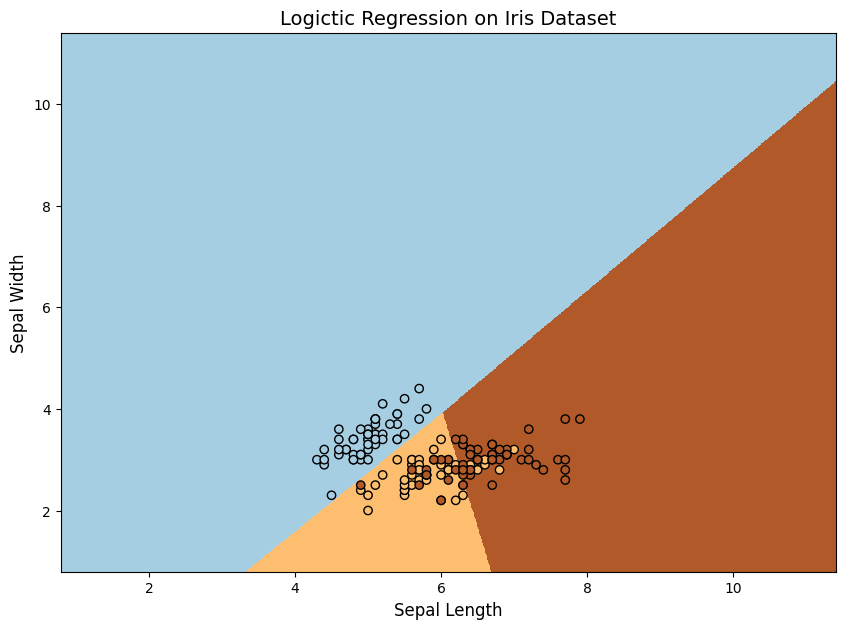

In [ ]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.title('Logictic Regression on Iris Dataset', fontsize=14)

plt.show()

As you can see, the iris has been classified into different categories.